# Import Libraries

In [1]:
library( tidyverse )

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library( tidymodels )

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
── Attaching packages ────────────────────────────────────── tidymodels 0.0.2 ──
✔ broom     0.5.2       ✔ recipes   0.1.5  
✔ dials     0.0.2       ✔ rsample   0.0.4  
✔ infer     0.4.0.1     ✔ yardstick 0.0.3  
✔ parsnip   0.0.2       
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()


In [3]:
library( GGally )

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [4]:
library( ggfortify )

# Non-linearly separable data

In [5]:
funkydata <- read_csv( 'funkydata.csv')

Parsed with column specification:
cols(
  Gaussian1 = col_double(),
  Gaussian2 = col_double(),
  Moon1 = col_double(),
  Moon2 = col_double(),
  Circle1 = col_double(),
  Circle2 = col_double(),
  Y = col_double()
)


In [8]:
dim( funkydata )

[1] 200   7

In [9]:
head( funkydata )

Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.7994022,0.1545466,0.3378872,0.7223668,-0.5261698,0.9038196,0
-0.3301211,2.3876841,0.2182633,1.0285021,-0.7966583,0.5804428,0
1.6558677,0.6681260,-0.7572982,0.6764793,0.1200559,-1.0731062,0
1.4185881,-0.8775885,1.8573782,0.2101548,0.3124032,-0.1364299,1
-0.1880097,2.6413564,-0.3005245,0.7175567,-0.6291578,-0.9690414,0
-1.1174380,1.8842391,-0.5581630,0.9105472,-0.6317169,-0.7896364,0


In [6]:
funkydata$Y <- factor( funkydata$Y  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


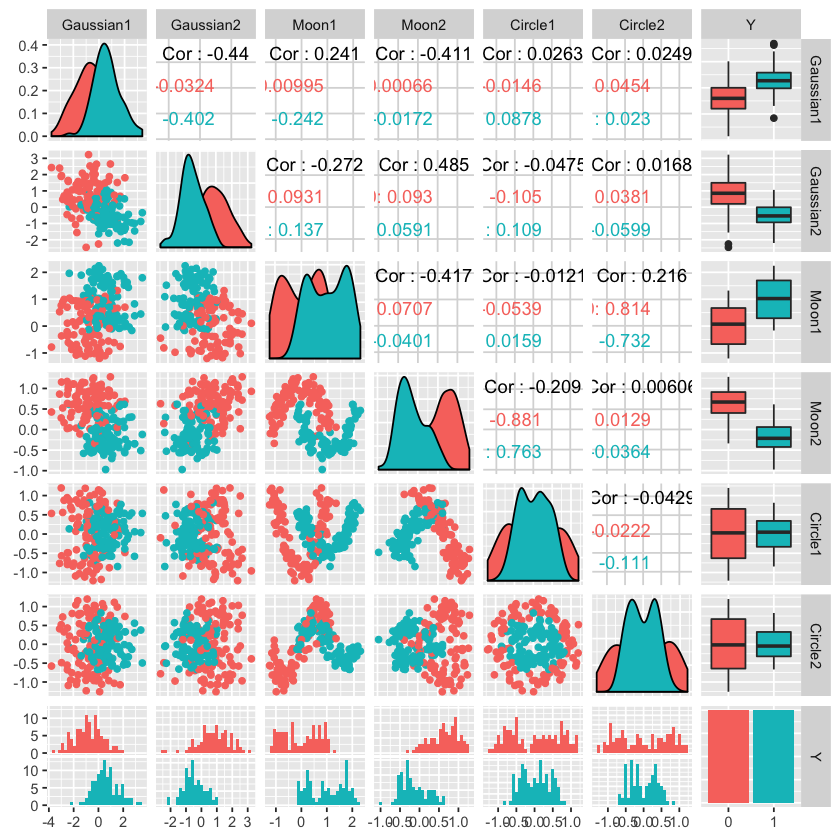

In [7]:
funkydata %>% ggpairs( aes( color=Y ) )

In [10]:
options(repr.plot.width=10, repr.plot.height=10)

Parsed with column specification:
cols(
  `0` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  Y = col_double()
)
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


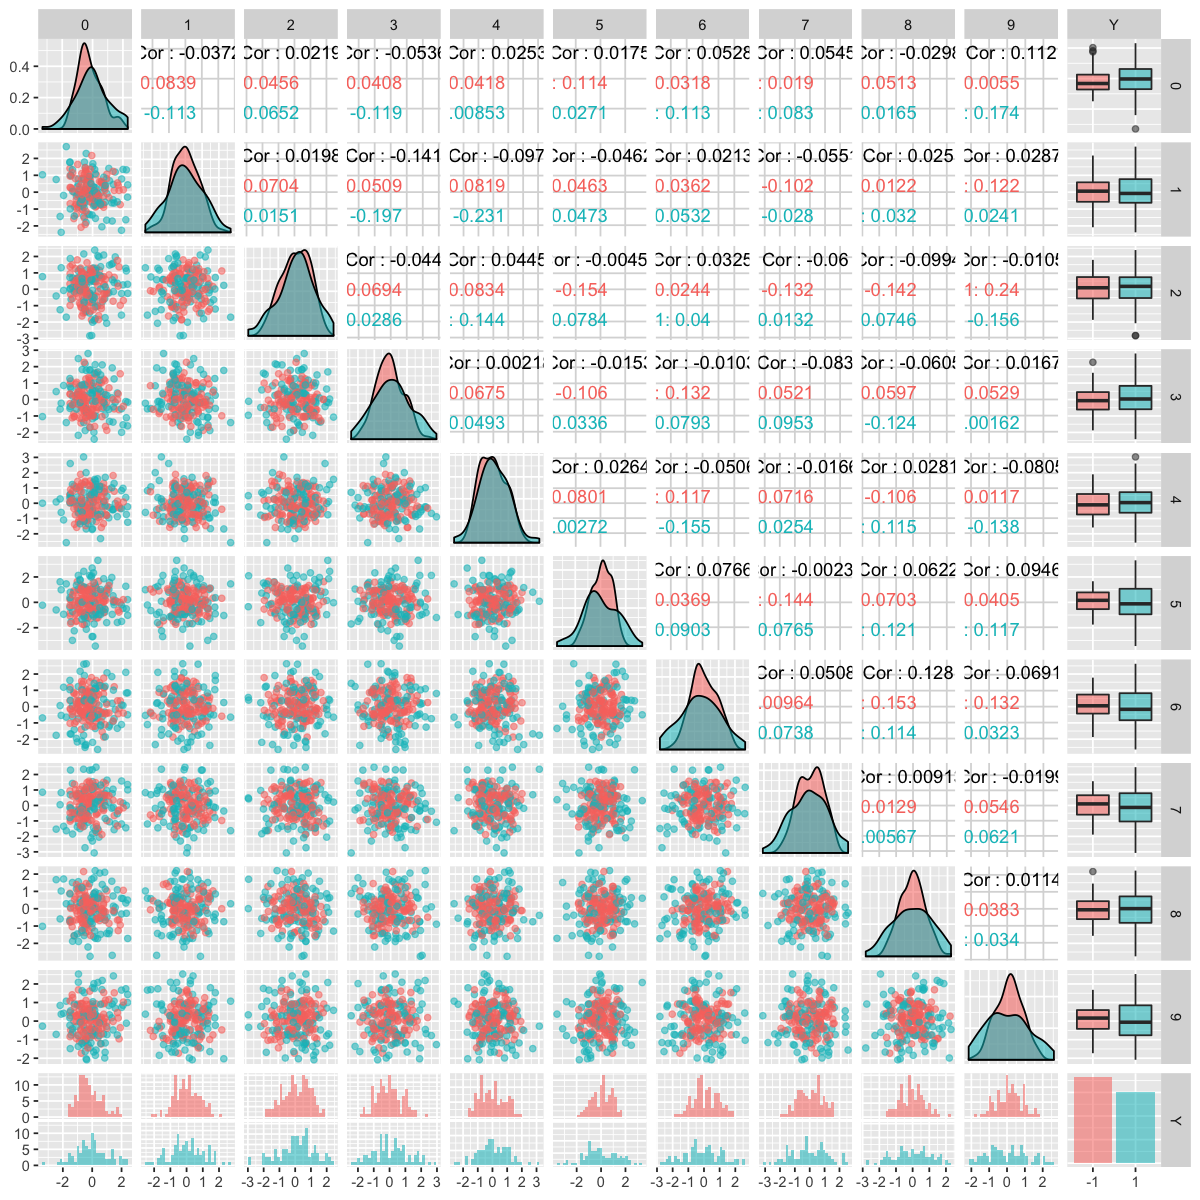

In [11]:
read_csv( 'unequal_variance_data.csv' ) %>%
    mutate( Y=factor(Y) ) %>%
    ggpairs( aes( color=Y, alpha=0.1 ) )

# Funkydata: Hold some test data in reserve to assess model fit

In [12]:
set.seed( 42 )
data_splitter <- initial_split( funkydata, prop=0.8 )
train_data <- training( data_splitter )
test_data <- testing( data_splitter )

In [13]:
dim( train_data )

[1] 161   7

In [14]:
dim( test_data )

[1] 39  7

# Train a Logistic Regression model

* Plain vanilla logistic regression 

In [15]:
model0 <- glm( Y ~ 1, train_data, family='binomial' )

In [16]:
summary( model0 )


Call:
glm(formula = Y ~ 1, family = "binomial", data = train_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.109  -1.109  -1.109   1.247   1.247  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1618     0.1581  -1.023    0.306

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 222.14  on 160  degrees of freedom
Residual deviance: 222.14  on 160  degrees of freedom
AIC: 224.14

Number of Fisher Scoring iterations: 3


In [17]:
model1 <- glm( Y ~ Gaussian1 + Gaussian2, train_data, family='binomial' )

In [18]:
summary( model1 )


Call:
glm(formula = Y ~ Gaussian1 + Gaussian2, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.54001  -0.54082  -0.08572   0.50573   1.96573  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.05751    0.23391  -0.246    0.806    
Gaussian1    1.35899    0.28286   4.804 1.55e-06 ***
Gaussian2   -1.45367    0.29487  -4.930 8.23e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 222.14  on 160  degrees of freedom
Residual deviance: 115.99  on 158  degrees of freedom
AIC: 121.99

Number of Fisher Scoring iterations: 6


In [19]:
anova( model0, model1 )

Resid. Df,Resid. Dev,Df,Deviance
<dbl>,<dbl>,<dbl>,<dbl>
160,222.1426,NA,NA
158,115.9891,2,106.1534


## Use augment() function to attached fitted values to original data frame

In [20]:
augmented_funky1 <- augment( model1 )

In [21]:
augmented_funky1 %>% head 

Y,Gaussian1,Gaussian2,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-0.7994022,0.1545466,-1.368548,0.3410897,-0.6733768,0.018813077,0.8578116,1.657610e-03,-0.6798018
0,-0.3301211,2.3876841,-3.977038,0.7507004,-0.1927051,0.010176560,0.8593866,6.488717e-05,-0.1936932
1,1.4185881,-0.8775885,3.146052,0.5572896,0.2902479,0.012281822,0.8592096,1.805354e-04,0.2920468
0,-1.1174380,1.8842391,-4.315150,0.7157296,-0.1629480,0.006666868,0.8594266,3.009990e-05,-0.1634939
0,-0.9947197,0.1794926,-1.670245,0.3845873,-0.5872655,0.019716611,0.8582211,1.287152e-03,-0.5931420
0,-0.9994371,-2.4650403,2.167613,0.7913876,-2.1335296,0.057713163,0.8414364,1.893083e-01,-2.1978959


## Plot distribution of TRAINING set fitted values colored by class

In [22]:
options(repr.plot.width=4, repr.plot.height=3)

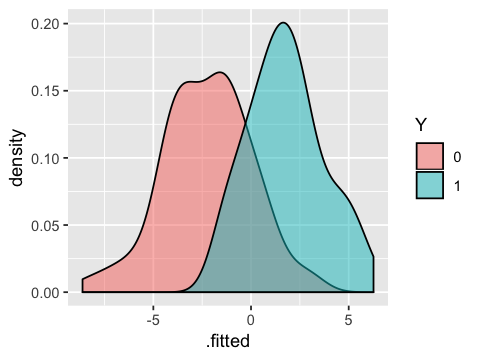

In [23]:
augmented_funky1 %>% ggplot( aes( x=.fitted, fill=Y) ) + geom_density( alpha=0.5 )

## Plot distribution of TEST set fitted values colored by class

In [24]:
Ypred_test <- predict( model1, test_data )

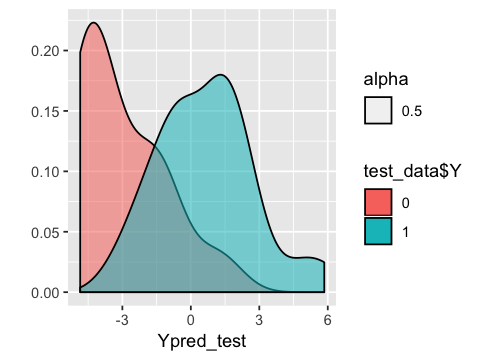

In [25]:
qplot( Ypred_test, geom='density', fill=test_data$Y, alpha=0.5 )

# Logit link function

* The target variable Y is binary (0/1, loss/win)
* The output is not a 0/1 directly, but the probability of a win
* Linear regression involves solving simultaneous linear equations => linear combinations
* Predicted values of a linear regression MUST also be linear. Consider:
    * $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + ... + \hat{\beta}_nx_n + \epsilon$ 
    * Use logit link function
    * $logit = log( Odds ) = log( \frac{p}{1-p} ) = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n + \epsilon$
    * logit function is a ["sigmoid" function](https://sebastianraschka.com/faq/docs/logistic-why-sigmoid.html)
* Exponentiate the coefficient to get the odds ratio - if bigger than 1, a 1 unit change in x is an increase
    * Odds ratio estimates = "times more likely" - probability of a win over probability of a loss

In [26]:
summary( model1 )


Call:
glm(formula = Y ~ Gaussian1 + Gaussian2, family = "binomial", 
    data = train_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.54001  -0.54082  -0.08572   0.50573   1.96573  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.05751    0.23391  -0.246    0.806    
Gaussian1    1.35899    0.28286   4.804 1.55e-06 ***
Gaussian2   -1.45367    0.29487  -4.930 8.23e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 222.14  on 160  degrees of freedom
Residual deviance: 115.99  on 158  degrees of freedom
AIC: 121.99

Number of Fisher Scoring iterations: 6


In [27]:
coef( model1 )

(Intercept)   Gaussian1   Gaussian2 
-0.05751129  1.35898694 -1.45366635

In [28]:
exp( coef( model1 ) )

(Intercept)   Gaussian1   Gaussian2 
  0.9441112   3.8922482   0.2337118

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


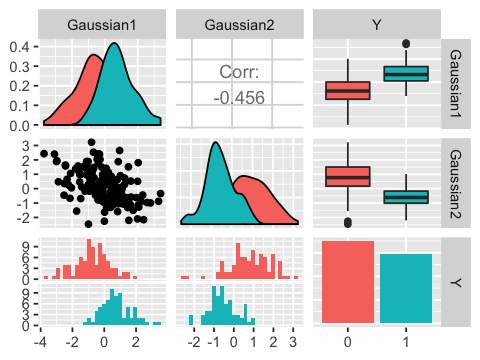

In [30]:
train_data %>% 
    select( Gaussian1, Gaussian2, Y) %>%
    ggpairs( aes( fill=Y ) )

In [31]:
Ypred_test <- predict( model1, test_data )

In [32]:
head( Ypred_test )

1          2          3          4          5          6 
 1.2215590 -4.1526649 -0.4408514  2.5870127 -3.2340638 -0.1909080

## Use type="response" argument to predict() to get probabilities

In [33]:
Ypred_test <- predict( model1, test_data, type='response' )

In [34]:
head(Ypred_test)

1          2          3          4          5          6 
0.77233778 0.01547909 0.39153812 0.93002105 0.03790377 0.45241742

## Classification metrics

* Goodness of fit is not adjusted R-squared, but rather accuracy, F1, ROC curve AUC, others...

In [35]:
length( Ypred_test )

[1] 39

In [37]:
head( Ypred_test )

1          2          3          4          5          6 
0.77233778 0.01547909 0.39153812 0.93002105 0.03790377 0.45241742

In [42]:
mean( as.numeric( Ypred_test > 0.5 ) == test_data$Y )

[1] 0.6666667

In [ ]:
# In class activity 1: How to get test prediction accuracy?

In [ ]:
# Homework: How to get four-square confusion matrix of TP/FP/FN/TN?

## ROC Curve 

* Receiver operator characteristic
* REquires probabilities to work
* [How to create a ROC curve](http://mlwiki.org/index.php/ROC_Analysis#Example_1)

In [43]:
install.packages( "ROCit" )

Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”Warning message:
“package ‘ROCit’ is not available (for R version 3.6.0)”

In [45]:
library(ROCit)

In [46]:
ROCit_obj <- rocit( score = Ypred_test, class = test_data$Y )

In [47]:
options(repr.plot.width=4, repr.plot.height=4)

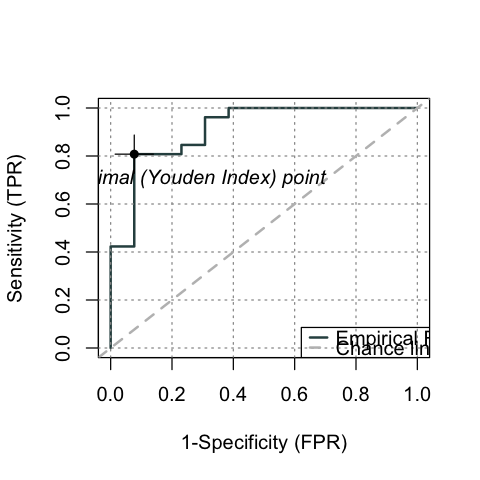

In [48]:
plot(ROCit_obj)

## Other Logistic regression considerations

### Categorical/nominal predictor variables
* One hot encoding: the creation of a dummy variable for each level, e.g.,
    * If you have a nominal variable with 12 cases, you just picked up 11 variables. Each one is going to have it's own coefficient.
* Options: change variable type to interval like an ordinal, or bin into "other" category

# Retrain GLM model with Parsnip interface (Tidyverse for modelling!)

* Parsnip is a unified modelling interface, allowing you to swap in and out classification algorithms easily

In [49]:
test_predictions <- logistic_reg() %>%
    set_engine( "glm" ) %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data ) %>%
    predict( test_data ) %>%
    bind_cols( test_data )

In [50]:
head( test_predictions )

.pred_class,Gaussian1,Gaussian2,Moon1,Moon2,Circle1,Circle2,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.65586765,0.66812598,-0.7572982,0.67647928,0.1200559,-1.07310621,0
0,-0.18800968,2.64135636,-0.3005245,0.71755671,-0.6291578,-0.96904142,0
0,0.06262386,0.32225076,2.0400183,0.41237844,0.4888741,-0.28609402,1
1,1.41794353,-0.49361894,1.8422351,0.00584937,0.5923969,-0.65389154,1
0,-2.31634471,0.01972274,1.9629823,0.60950815,0.1341592,-0.07741052,1
0,-0.22614206,-0.11964738,0.6500019,-0.14814799,-0.6925768,0.33714084,1


In [62]:
y <- as.numeric( as.character( test_predictions$Y ) )

In [60]:
head( ypred )

[1] 2 1 1 2 1 1

In [59]:
mean( as.numeric( ypred > 0.5 ) == y )

[1] 0.3333333

In [66]:
model1 <- glm( Y ~ ., train_data, family='binomial')

In [68]:
ypred <- predict( model1, test_data, type="response")

In [69]:
mean( as.numeric( ypred > 0.5 ) == test_data$Y )

[1] 0.8461538

# Random Forest classifier

* [RF YouTube explainer](https://www.youtube.com/watch?v=D_2LkhMJcfY&t=165s)

In [70]:
rand_forest_model <- rand_forest() %>%
    set_engine( "ranger" )

In [71]:
rf_fit <- rand_forest_model %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data )

In [75]:
rf_fit

parsnip model object

Ranger result

Call:
 ranger::ranger(formula = formula, data = data, num.threads = 1,      verbose = FALSE, seed = sample.int(10^5, 1)) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      161 
Number of independent variables:  2 
Mtry:                             1 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             19.88 % 

In [ ]:
#rf_fit %>%  predict( test_data )

# XGBoost classifier

* Gradient-boosted classification trees [YouTube explainer](https://www.youtube.com/watch?v=0Xc9LIb_HTw)

In [76]:
test_predictions <- boost_tree() %>%
    set_engine( "xgboost" ) %>% 
    fit( Y ~ Gaussian1 + Gaussian2, train_data ) %>%
    predict( test_data ) %>%
    bind_cols( test_data )

In [80]:
mean( as.character(test_predictions$.pred_class) == 
 as.character(test_predictions$Y) )

[1] 0.7692308